In [1]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importamos librerías que vamos a usar
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math

In [6]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

### **<font color="Purple"> Datos históricos </font>**

In [7]:
u_filename='ua_Amon_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_195001-201412.nc'

In [8]:
u_ds=xr.open_dataset(u_filename)
ua=u_ds['ua']  #viento zonal
plevu=u_ds['plev'] #presiones
lon = u_ds['lon']
lat = u_ds['lat']

In [9]:
#Seleccionar la región y los años
RegN_MX = ua.sel(lon=slice(235, 300),lat=slice(15,42)).where(ua.time.dt.year >= 1979, drop=True)

In [10]:
#primero agrupar por meses y promediar en el tiempo
RNMX_mes=RegN_MX.groupby(RegN_MX.time.dt.month).mean(dim='time')

In [18]:
#aquí se van a guardar los máximos
latitudes = [] 
alturas = []

for imonth,month in enumerate(RNMX_mes.month):    
    h_max = RNMX_mes.sel(month=month).mean(dim=['lat','lon']).argmax(dim='plev') #me está dando los valores máximos de ua pero dónde están en altura?
    latitud = RNMX_mes.sel(month=month).mean(dim=['plev','lon']).argmax(dim='lat') #lo mismo que arriba, dónde están en latitud?

    alturas.append(h_max)
    latitudes.append(latitud)
latis = RNMX_mes.lat

In [24]:
lat_max = latis.isel(lat=latitudes)

In [13]:
latitudes #tendrían que ser mayor a 20, no?

[<xarray.DataArray 'ua' ()> Size: 8B
 array(16)
 Coordinates:
     month    int64 8B 1,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(15)
 Coordinates:
     month    int64 8B 2,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(13)
 Coordinates:
     month    int64 8B 3,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(16)
 Coordinates:
     month    int64 8B 4,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(20)
 Coordinates:
     month    int64 8B 5,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(21)
 Coordinates:
     month    int64 8B 6,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(21)
 Coordinates:
     month    int64 8B 7,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(21)
 Coordinates:
     month    int64 8B 8,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(21)
 Coordinates:
     month    int64 8B 9,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(21)
 Coordinates:
     month    int64 8B 10,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(18)
 Coordinates:
     month    int64 8B 11,
 <xarray.DataArray 'ua' ()> Si

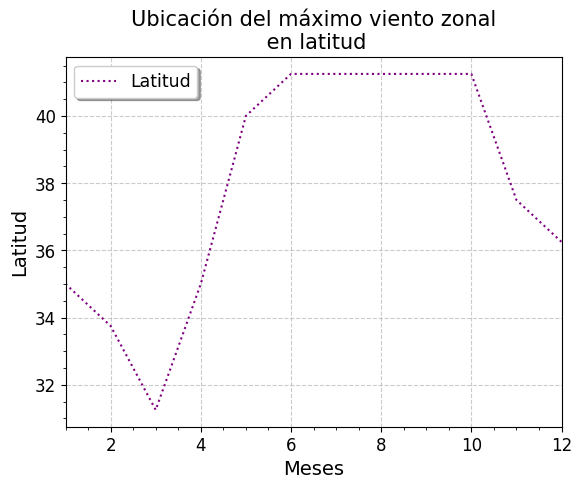

In [20]:
plt.plot(RNMX_mes.month,lat_max,label='Latitud',color='purple',linestyle=':')
lineplot_setup(1,12,'Meses','Latitud',ymin=None,ymax=None,title='Ubicación del máximo viento zonal\n en latitud',legend=True)

# por qué cero?

In [15]:
alturas #tendrían que ser valores de menos de 500 hPa, no está bien la gráfica, no está poniendo presiones en eje ye

[<xarray.DataArray 'ua' ()> Size: 8B
 array(9)
 Coordinates:
     month    int64 8B 1,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(9)
 Coordinates:
     month    int64 8B 2,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(9)
 Coordinates:
     month    int64 8B 3,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(9)
 Coordinates:
     month    int64 8B 4,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(10)
 Coordinates:
     month    int64 8B 5,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(9)
 Coordinates:
     month    int64 8B 6,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(9)
 Coordinates:
     month    int64 8B 7,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(9)
 Coordinates:
     month    int64 8B 8,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(9)
 Coordinates:
     month    int64 8B 9,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(18)
 Coordinates:
     month    int64 8B 10,
 <xarray.DataArray 'ua' ()> Size: 8B
 array(18)
 Coordinates:
     month    int64 8B 11,
 <xarray.DataArray 'ua' ()> Size: 8B
 

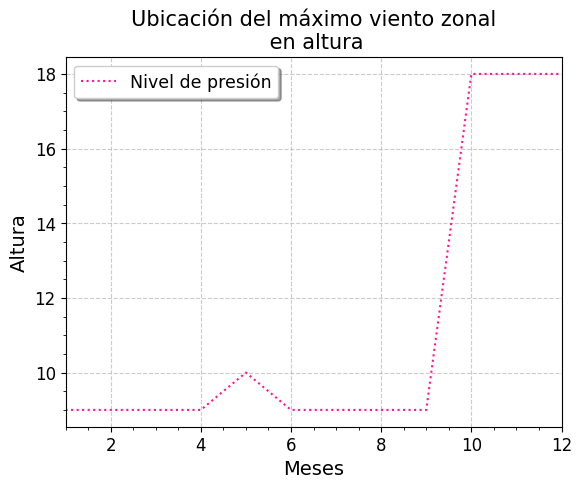

In [21]:
plt.plot(RNMX_mes.month,alturas,label='Nivel de presión',color='deeppink',linestyle=':')
lineplot_setup(1,12,'Meses','Altura',ymin=None,ymax=None,title='Ubicación del máximo viento zonal\n en altura',legend=True)